In [0]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline


In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape # sprawdzamy rozmiar danych treningowych i testowych

((60000, 28, 28), (10000, 28, 28))

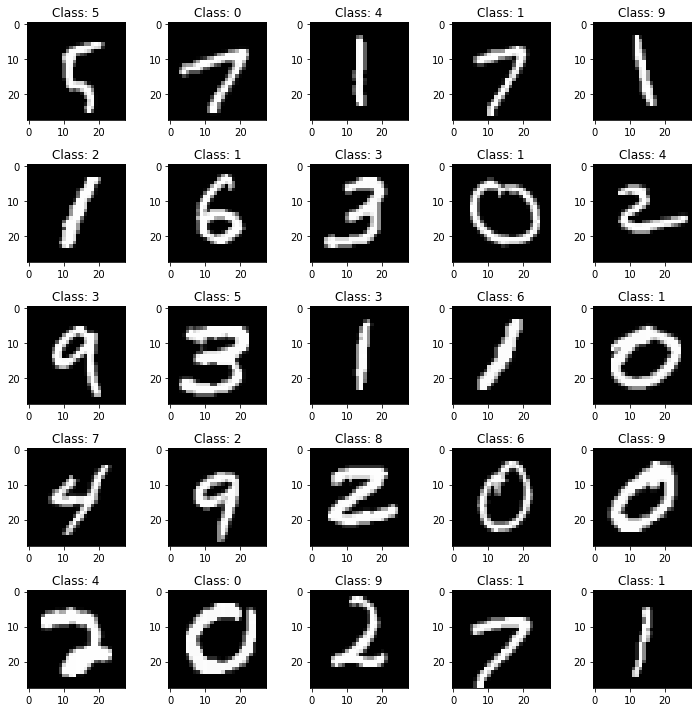

In [54]:
plt.figure(figsize=(10, 10)) # zwiększamy rozmiar naszych obrazkó do 10 x 10
for idx in range(25):
  plt.subplot(5, 5, idx+1)
  plt.imshow(X_train[idx+100], cmap='gray')
  plt.title('Class: {}'.format(y_train[idx])) # robimy wizualizację

plt.tight_layout() # tym wiereszem oddalamy zdjęcia od siebie, tak aby jedno nie nachodziło na drugie

In [33]:
X_train.shape # sprawdzamy rozmiar, maja być 4



(60000, 28, 28)

In [55]:
# przekształcamy X na model w którym ma 4 wymiary - ilość zdjęć, rozmiar zdjęć, tj. 28 x 28, ilość kanałów
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape 

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
# nasz model potrzeuje tego, aby mieć wektor a nie pojedyncze liczby

In [0]:
# model wymaga wartości od 0 do 1, dlatego będziemy dzielić wszystko przez 255 i w ten sposób normalizować

if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [57]:
X_test.max()

1.0

In [62]:
y_train # patrzymy jaką mamy tablicę

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] dążymy do uzyskania tablicy z takimi wartościami

In [69]:
# model będzie prognozować prawdopodobieństwo dla wszystkich dostępnych klas

if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)



array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape = input_shape),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),    
    Dense(num_classes, activation='softmax')


])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# TRENOWANIE

In [84]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)   
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 53s 878us/step - loss: 0.1692 - acc: 0.9489 - val_loss: 0.0574 - val_acc: 0.9816
Epoch 2/3
60000/60000 [==============================] - 51s 852us/step - loss: 0.0454 - acc: 0.9856 - val_loss: 0.0399 - val_acc: 0.9874
Epoch 3/3
60000/60000 [==============================] - 51s 852us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0346 - val_acc: 0.9893


In [0]:
# Testowanie

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [87]:
score

[0.03457231048398535, 0.9893]

In [0]:
# druga liczba to accuracy, my mamy 98,93%